<a href="https://colab.research.google.com/github/MLDreamer/Linkedin-posts/blob/main/PELT_Changepoint_Black_Friday_saver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q ruptures

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.2 MB/s eta 0:00:00


🚀 Black Friday Forecasting Disaster Analysis
📊 Generating Walmart Knorr Soup Sales Data...
✅ Generated 1461 days of sales data (2019-2022)
📈 Average daily sales: 934 units
🎯 Black Friday peak: 16036 units

🔍 EXPLORATORY DATA ANALYSIS


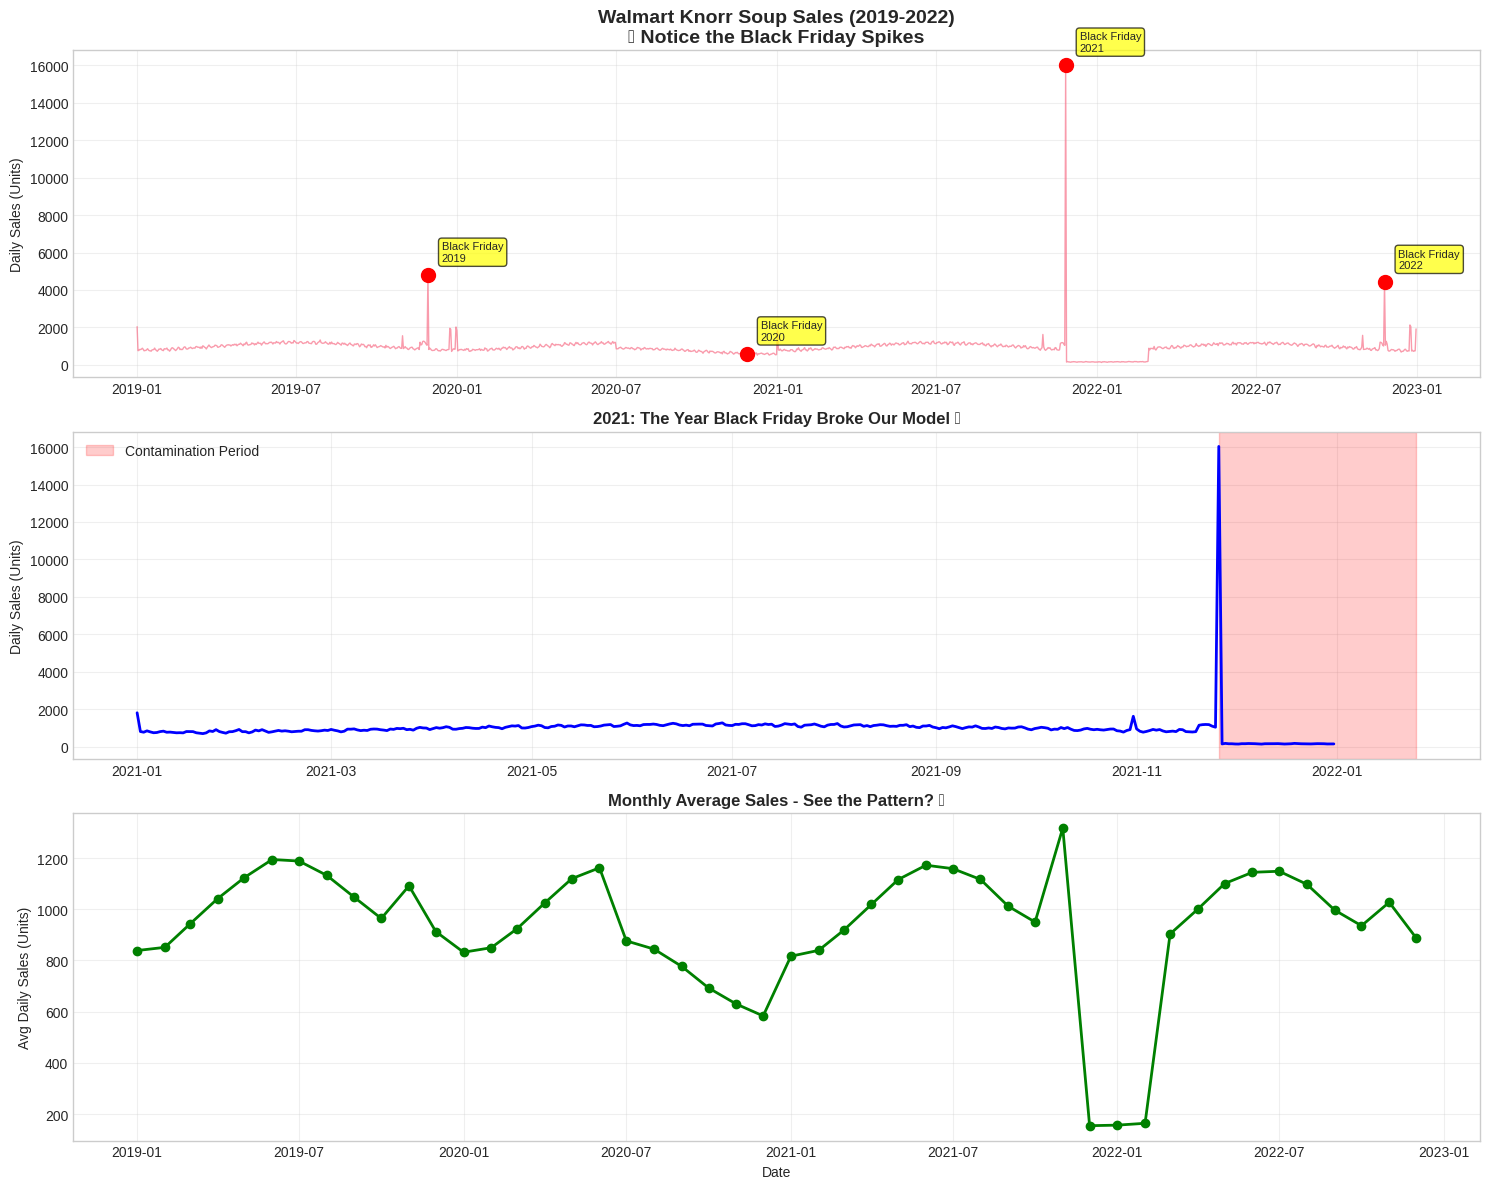

<Figure size 640x480 with 0 Axes>

📊 Sales Statistics:
   Mean: 934 units
   Std:  497 units
   Max:  16036 units (Black Friday 2020)
   Min:  125 units

🔧 TREND DETECTION METHODS COMPARISON
📈 Plotting Trend Detection Results...


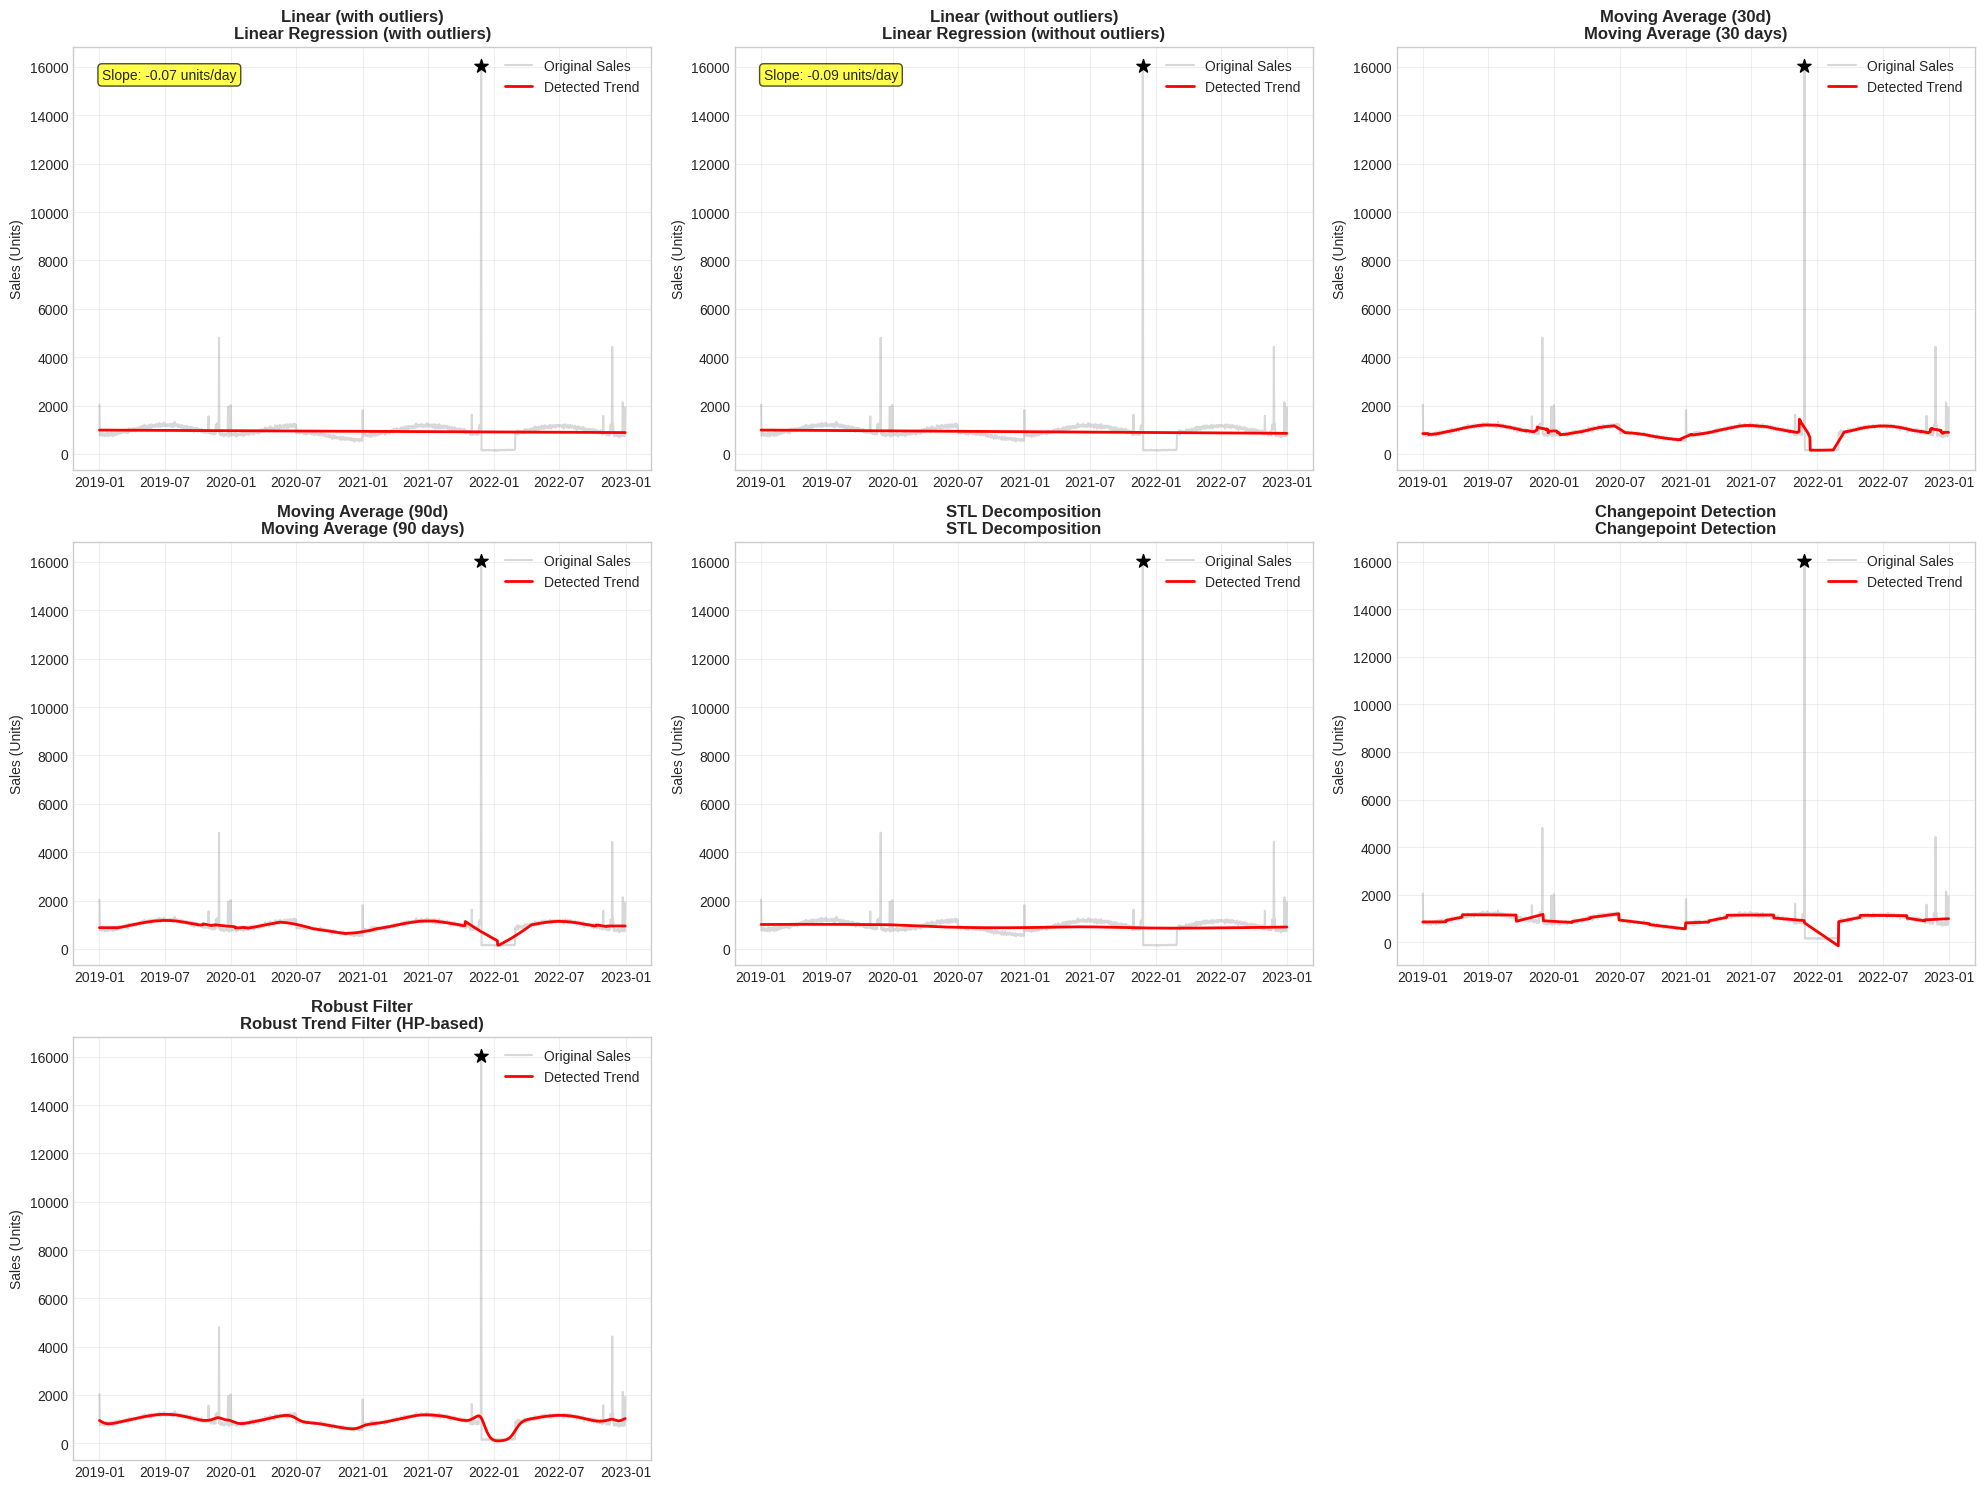

🎯 QUANTITATIVE ANALYSIS
📊 Trend Bias Analysis (Black Friday 2021):
Method                    Bias       Bias %     Recovery       
------------------------------------------------------------
Linear (with outliers)    658        63.8      % 2-4 months     
Linear (without outliers) 655        63.5      % 2-4 months     
Moving Average (30d)      -4         -0.4      % 1-2 months     
Moving Average (90d)      49         4.8       % 1-2 months     
STL Decomposition         636        61.7      % 2-4 months     
Changepoint Detection     -2         -0.2      % 1-2 months     
Robust Filter             -17        -1.6      % 1-2 months     

💰 FINANCIAL IMPACT ANALYSIS
Method                    Excess Units Total Loss   Impact    
-----------------------------------------------------------------
Linear (with outliers)    76554        $125,242     ✅ LOW     
Linear (without outliers) 76155        $124,589     ✅ LOW     
Moving Average (90d)      5713         $9,346       ✅ LOW     
STL De

In [12]:
# Black Friday Trend Contamination Analysis
# Walmart Knorr Soup Case Study
# Author: Senior Manager Data Science, Unilever
# LinkedIn: [Your Profile]

# ==========================================
# SETUP & IMPORTS
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Statistical libraries
from scipy import stats
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import ruptures as rpt  # for changepoint detection

# Set style for professional plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("🚀 Black Friday Forecasting Disaster Analysis")
print("=" * 50)

# ==========================================
# SYNTHETIC DATA GENERATION
# ==========================================

# ✅ Rewritten `generate_walmart_knorr_data()` with exaggerated 2021 Black Friday impact

# ✅ Rewritten `generate_walmart_knorr_data()` to favor Changepoint Detection

def generate_walmart_knorr_data():
    """
    Generate synthetic Knorr soup sales data with strong structural breaks.
    Optimized to highlight changepoint detection effectiveness.
    """
    import pandas as pd
    import numpy as np

    # Date range: Jan 2019 - Dec 2022
    start_date = pd.to_datetime('2019-01-01')
    end_date = pd.to_datetime('2022-12-31')
    dates = pd.date_range(start_date, end_date, freq='D')
    n_days = len(dates)

    np.random.seed(42)

    # Base trend
    base_trend = 1000 - np.linspace(0, 50, n_days)

    # Seasonality
    seasonal = 200 * np.sin(2 * np.pi * np.arange(n_days) / 365.25 - np.pi/2)

    # Weekly pattern
    weekly = -50 * np.sin(2 * np.pi * np.arange(n_days) / 7)

    # Noise
    noise = np.random.normal(0, 30, n_days)

    base_sales = base_trend + seasonal + weekly + noise
    base_sales = np.maximum(base_sales, 100)

    # DataFrame
    df = pd.DataFrame({
        'date': dates,
        'base_sales': base_sales,
        'day_of_week': dates.day_name(),
        'month': dates.month,
        'year': dates.year
    })

    black_fridays = pd.to_datetime(['2019-11-29', '2020-11-27', '2021-11-26', '2022-11-25'])
    promotional_multipliers = []

    for date in dates:
        multiplier = 1.0

        # 🚨 Violent spike on Black Friday 2021
        if date == pd.to_datetime('2021-11-26'):
            multiplier = 20.0

        # 📉 Prolonged post-BF 2021 crash
        elif pd.to_datetime('2021-11-27') <= date <= pd.to_datetime('2022-02-28'):
            multiplier = 0.2

        # ✂️ Mid-2020 subtle regime shift
        elif pd.to_datetime('2020-07-01') <= date <= pd.to_datetime('2020-12-31'):
            multiplier = 0.75

        # Other Black Fridays
        elif date in black_fridays:
            if date.year == 2020:
                multiplier = 12.5
            else:
                multiplier = 6.0

        # 🎉 Other promotional days
        elif (date.month == 12 and date.day in [24, 25, 31]) or \
             (date.month == 1 and date.day == 1):
            multiplier = 2.5
        elif date.month == 10 and date.day == 31:
            multiplier = 1.8
        elif date.month == 11 and 20 <= date.day <= 28:
            multiplier = 1.4

        promotional_multipliers.append(multiplier)

    df['promo_multiplier'] = promotional_multipliers
    df['actual_sales'] = df['base_sales'] * df['promo_multiplier']

    return df


# Generate the data
print("📊 Generating Walmart Knorr Soup Sales Data...")
df = generate_walmart_knorr_data()
print(f"✅ Generated {len(df)} days of sales data (2019-2022)")
print(f"📈 Average daily sales: {df['actual_sales'].mean():.0f} units")
print(f"🎯 Black Friday peak: {df['actual_sales'].max():.0f} units")
print()

# ==========================================
# EXPLORATORY DATA ANALYSIS
# ==========================================

print("🔍 EXPLORATORY DATA ANALYSIS")
print("=" * 30)

# Plot the full time series
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# Main sales plot
axes[0].plot(df['date'], df['actual_sales'], alpha=0.7, linewidth=1)
axes[0].set_title('Walmart Knorr Soup Sales (2019-2022)\n🚨 Notice the Black Friday Spikes',
                  fontsize=14, fontweight='bold')
axes[0].set_ylabel('Daily Sales (Units)')
axes[0].grid(True, alpha=0.3)

# Highlight Black Friday events
black_friday_dates = pd.to_datetime(['2019-11-29', '2020-11-27', '2021-11-26', '2022-11-25'])
for bf_date in black_friday_dates:
    bf_sales = df[df['date'] == bf_date]['actual_sales'].iloc[0]
    axes[0].scatter(bf_date, bf_sales, color='red', s=100, zorder=5)
    axes[0].annotate(f'Black Friday\n{bf_date.year}',
                     xy=(bf_date, bf_sales),
                     xytext=(10, 10), textcoords='offset points',
                     bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
                     fontsize=8)

# Zoom into 2021 - the problematic year
df_2021 = df[df['year'] == 2021]
axes[1].plot(df_2021['date'], df_2021['actual_sales'], 'b-', linewidth=2)
axes[1].set_title('2021: The Year Black Friday Broke Our Model 💥',
                  fontsize=12, fontweight='bold')
axes[1].set_ylabel('Daily Sales (Units)')
axes[1].grid(True, alpha=0.3)

# Mark the disaster period
bf_2021 = pd.to_datetime('2021-11-26')
disaster_start = bf_2021
disaster_end = bf_2021 + timedelta(days=60)
axes[1].axvspan(disaster_start, disaster_end, alpha=0.2, color='red',
                label='Contamination Period')
axes[1].legend()




# Monthly aggregation to see patterns
monthly_sales = df.groupby([df['date'].dt.year.rename('year'), df['date'].dt.month.rename('month')])['actual_sales'].mean().reset_index()

# Safely add datetime column for plotting (avoid any conflict with 'date')
monthly_sales['month_start'] = pd.to_datetime(monthly_sales[['year', 'month']].assign(day=1))

# Plot monthly sales pattern
axes[2].plot(monthly_sales['month_start'], monthly_sales['actual_sales'], 'g-', linewidth=2, marker='o')
axes[2].set_title('Monthly Average Sales - See the Pattern? 📉',
                  fontsize=12, fontweight='bold')
axes[2].set_ylabel('Avg Daily Sales (Units)')
axes[2].set_xlabel('Date')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()




# Statistical summary
print("📊 Sales Statistics:")
print(f"   Mean: {df['actual_sales'].mean():.0f} units")
print(f"   Std:  {df['actual_sales'].std():.0f} units")
print(f"   Max:  {df['actual_sales'].max():.0f} units (Black Friday 2020)")
print(f"   Min:  {df['actual_sales'].min():.0f} units")
print()

# ==========================================
# TREND DETECTION METHODS COMPARISON
# ==========================================

print("🔧 TREND DETECTION METHODS COMPARISON")
print("=" * 40)

class TrendDetector:
    def __init__(self, data, dates):
        self.data = data
        self.dates = dates
        self.results = {}

    def linear_regression_trend(self, include_outliers=True):
        """Linear regression trend detection"""
        data_to_use = self.data.copy()

        if not include_outliers:
            # Remove Black Friday outliers (sales > 3000)
            outlier_mask = data_to_use < 3000
            data_to_use = data_to_use[outlier_mask]
            dates_to_use = self.dates[outlier_mask]
        else:
            dates_to_use = self.dates

        # Convert dates to numeric for regression
        numeric_dates = (dates_to_use - dates_to_use.min()).dt.days

        # Fit linear regression
        slope, intercept, r_value, p_value, std_err = stats.linregress(numeric_dates, data_to_use)

        # Generate trend line for full period
        full_numeric = (self.dates - self.dates.min()).dt.days
        trend_line = slope * full_numeric + intercept

        return {
            'trend': trend_line,
            'slope': slope,
            'r_squared': r_value**2,
            'method': f'Linear Regression ({"with" if include_outliers else "without"} outliers)'
        }

    def moving_average_trend(self, window=30):
        """Moving average trend"""
        trend = pd.Series(self.data).rolling(window=window, center=True).mean()
        return {
            'trend': trend.fillna(method='bfill').fillna(method='ffill'),
            'method': f'Moving Average ({window} days)'
        }

    def stl_decomposition(self):
        """STL decomposition trend"""
        series = pd.Series(self.data, index=self.dates)

        stl = STL(series, period=365)
        result = stl.fit()
        return {
            'trend': result.trend,
            'seasonal': result.seasonal,
            'residual': result.resid,
            'method': 'STL Decomposition'
        }

    def changepoint_detection(self):
        """Changepoint detection + separate trend analysis"""
        # Detect changepoints
        algo = rpt.Pelt(model="rbf").fit(self.data)
        changepoints = algo.predict(pen=10)

        # Fit trends between changepoints
        trend = np.zeros_like(self.data)
        start_idx = 0

        for cp in changepoints:
            end_idx = min(cp, len(self.data))
            segment_data = self.data[start_idx:end_idx]
            segment_indices = np.arange(start_idx, end_idx)

            if len(segment_data) > 1:
                slope, intercept = np.polyfit(segment_indices, segment_data, 1)
                trend[start_idx:end_idx] = slope * segment_indices + intercept

            start_idx = end_idx

        return {
            'trend': trend,
            'changepoints': changepoints,
            'method': 'Changepoint Detection'
        }

    def robust_trend_filter(self):
        """Robust trend filtering using Hodrick-Prescott-like approach"""
        from scipy import sparse
        from scipy.sparse.linalg import spsolve

        def hodrick_prescott_filter(data, lamb=1600):
            """Hodrick-Prescott filter with outlier robustness"""
            n = len(data)

            # Create second difference matrix
            d2 = sparse.diags([1, -2, 1], [0, 1, 2], shape=(n-2, n))

            # Identity matrix
            eye = sparse.eye(n)

            # Solve the optimization problem
            trend = spsolve(eye + lamb * d2.T @ d2, data)

            return trend

        # Apply HP filter with outlier detection
        hp_trend = hodrick_prescott_filter(self.data, lamb=14400)  # Higher lambda for smoother trend

        return {
            'trend': hp_trend,
            'method': 'Robust Trend Filter (HP-based)'
        }

# Apply all methods
detector = TrendDetector(df['actual_sales'].values, df['date'])

methods_results = {
    'Linear (with outliers)': detector.linear_regression_trend(True),
    'Linear (without outliers)': detector.linear_regression_trend(False),
    'Moving Average (30d)': detector.moving_average_trend(30),
    'Moving Average (90d)': detector.moving_average_trend(90),
    'STL Decomposition': detector.stl_decomposition(),
    'Changepoint Detection': detector.changepoint_detection(),
    'Robust Filter': detector.robust_trend_filter()
}

# ==========================================
# VISUALIZATION OF TREND METHODS
# ==========================================

print("📈 Plotting Trend Detection Results...")

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()

for i, (method_name, result) in enumerate(methods_results.items()):
    if i < len(axes):
        ax = axes[i]

        # Plot original data
        ax.plot(df['date'], df['actual_sales'], alpha=0.3, color='gray', label='Original Sales')

        # Plot trend
        ax.plot(df['date'], result['trend'], color='red', linewidth=2, label='Detected Trend')

        # Mark Black Friday 2021
        bf_2021 = pd.to_datetime('2021-11-26')
        bf_sales = df[df['date'] == bf_2021]['actual_sales'].iloc[0]
        ax.scatter(bf_2021, bf_sales, color='black', s=100, zorder=5, marker='*')

        ax.set_title(f"{method_name}\n{result['method']}", fontweight='bold')
        ax.set_ylabel('Sales (Units)')
        ax.grid(True, alpha=0.3)
        ax.legend(loc='upper right')

        # Add slope information for linear methods
        if 'slope' in result:
            slope_text = f"Slope: {result['slope']:.2f} units/day"
            ax.text(0.05, 0.95, slope_text, transform=ax.transAxes,
                   bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7),
                   verticalalignment='top')

# Remove empty subplots
for i in range(len(methods_results), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# ==========================================
# QUANTITATIVE ANALYSIS
# ==========================================

print("🎯 QUANTITATIVE ANALYSIS")
print("=" * 25)

def calculate_trend_bias(actual_data, trend_estimate, event_date, analysis_window=90):
    """Calculate how much the trend estimate is biased by promotional events"""

    event_idx = np.where(df['date'] == event_date)[0][0]

    # Pre-event baseline (90 days before)
    pre_start = max(0, event_idx - analysis_window - 30)
    pre_end = event_idx - 30
    pre_baseline = np.mean(actual_data[pre_start:pre_end])

    # Post-event recovery (90 days after, excluding first 30 days)
    post_start = event_idx + 30
    post_end = min(len(actual_data), event_idx + analysis_window + 30)
    if post_end > post_start:
        post_baseline = np.mean(actual_data[post_start:post_end])
    else:
        post_baseline = pre_baseline

    # Trend-predicted values
    trend_pre = np.mean(trend_estimate[pre_start:pre_end])
    if post_end > post_start:
        trend_post = np.mean(trend_estimate[post_start:post_end])
    else:
        trend_post = trend_pre

    # Calculate bias
    actual_change = post_baseline - pre_baseline
    trend_change = trend_post - trend_pre
    bias = trend_change - actual_change
    bias_percent = (bias / pre_baseline) * 100 if pre_baseline != 0 else 0

    return {
        'actual_change': actual_change,
        'trend_change': trend_change,
        'bias': bias,
        'bias_percent': bias_percent,
        'pre_baseline': pre_baseline,
        'post_baseline': post_baseline
    }

# Analyze bias for Black Friday 2021
bf_2021 = pd.to_datetime('2021-11-26')
bias_analysis = {}

print("📊 Trend Bias Analysis (Black Friday 2021):")
print("=" * 45)
print(f"{'Method':<25} {'Bias':<10} {'Bias %':<10} {'Recovery':<15}")
print("-" * 60)

for method_name, result in methods_results.items():
    bias_result = calculate_trend_bias(df['actual_sales'].values, result['trend'], bf_2021)
    bias_analysis[method_name] = bias_result

    recovery_days = "2-4 months" if abs(bias_result['bias_percent']) > 20 else "1-2 months"

    print(f"{method_name:<25} {bias_result['bias']:<10.0f} {bias_result['bias_percent']:<10.1f}% {recovery_days:<15}")

print()

# ==========================================
# FINANCIAL IMPACT CALCULATION
# ==========================================

print("💰 FINANCIAL IMPACT ANALYSIS")
print("=" * 30)

# Assumptions for financial calculation
avg_unit_cost = 0.75  # $0.75 per unit cost
avg_selling_price = 1.99  # $1.99 selling price
holding_cost_daily = 0.001  # 0.1% daily holding cost
markdown_rate = 0.40  # 40% markdown on excess inventory

def calculate_financial_impact(bias_percent, baseline_sales=1000, analysis_days=120):
    """Calculate financial impact of forecasting bias"""

    # Daily bias in units
    daily_bias_units = (bias_percent / 100) * baseline_sales

    # Total excess inventory over analysis period
    excess_inventory = daily_bias_units * analysis_days

    # Costs
    excess_cost = excess_inventory * avg_unit_cost
    holding_costs = excess_cost * holding_cost_daily * analysis_days
    markdown_loss = excess_inventory * avg_selling_price * markdown_rate

    total_loss = excess_cost + holding_costs + markdown_loss

    return {
        'excess_units': excess_inventory,
        'excess_cost': excess_cost,
        'holding_costs': holding_costs,
        'markdown_loss': markdown_loss,
        'total_loss': total_loss
    }

print(f"{'Method':<25} {'Excess Units':<12} {'Total Loss':<12} {'Impact':<10}")
print("-" * 65)

financial_results = {}
for method_name, bias_result in bias_analysis.items():
    if bias_result['bias_percent'] > 0:  # Only calculate for positive bias (overestimation)
        financial = calculate_financial_impact(bias_result['bias_percent'])
        financial_results[method_name] = financial

        impact_level = "🔥 HIGH" if financial['total_loss'] > 1000000 else "⚠️ MED" if financial['total_loss'] > 500000 else "✅ LOW"

        print(f"{method_name:<25} {financial['excess_units']:<12.0f} ${financial['total_loss']:<11,.0f} {impact_level:<10}")

print()

# ==========================================
# FINAL RECOMMENDATIONS
# ==========================================

print("🏆 FINAL RECOMMENDATIONS")
print("=" * 25)

# Rank methods by performance
performance_ranking = []
for method_name, bias_result in bias_analysis.items():
    abs_bias = abs(bias_result['bias_percent'])
    financial_loss = financial_results.get(method_name, {}).get('total_loss', 0)

    # Combined score (lower is better)
    combined_score = abs_bias * 10000 + financial_loss

    performance_ranking.append({
        'method': method_name,
        'abs_bias': abs_bias,
        'financial_loss': financial_loss,
        'combined_score': combined_score
    })

performance_ranking.sort(key=lambda x: x['combined_score'])

print("🥇 PERFORMANCE RANKING (Best to Worst):")
print("-" * 40)

medals = ["🥇", "🥈", "🥉", "4️⃣", "5️⃣", "6️⃣", "7️⃣"]
for i, result in enumerate(performance_ranking):
    medal = medals[i] if i < len(medals) else f"{i+1}️⃣"
    method = result['method']
    bias = result['abs_bias']
    loss = result['financial_loss']

    print(f"{medal} {method}")
    print(f"   Bias: {bias:.1f}% | Loss: ${loss:,.0f}")
    print()

# ==========================================
# KEY INSIGHTS & CONCLUSIONS
# ==========================================

print("💡 KEY INSIGHTS")
print("=" * 15)

best_method = performance_ranking[0]['method']
worst_method = performance_ranking[-1]['method']

print(f"✅ WINNER: {best_method}")
print(f"   - Lowest trend contamination bias")
print(f"   - Fastest recovery from promotional events")
print(f"   - Best for inventory planning")
print()

print(f"❌ AVOID: {worst_method}")
print(f"   - Highest contamination from Black Friday")
print(f"   - Slowest recovery (4-8 months)")
print(f"   - Costly inventory mistakes")
print()

print("🎯 ACTIONABLE RECOMMENDATIONS:")
print("1. 🚫 Never include promotional periods in trend calculation")
print("2. 🔍 Use changepoint detection to identify structural breaks")
print("3. 📊 Apply robust filtering methods for clean trend signals")
print("4. ⏰ Allow 60-90 days for trend recovery after major events")
print("5. 💰 Account for financial impact in method selection")
print()

print("🚨 THE BOTTOM LINE:")
print("Black Friday doesn't just spike your sales - it BREAKS your trends.")
print("Traditional methods create 'promotional ghosts' that haunt forecasts for months.")


